In [904]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance
from scipy.stats import multivariate_normal
from sklearn.metrics import confusion_matrix

# PROBLEM 1 : BOOSTING

# PART A: Plotting the training error


In [919]:
x_train = pd.read_csv('Prob1_X.csv',header= None)
y_train = pd.read_csv('Prob1_y.csv',header= None)


def indicator(val,y):
    temp = val/abs(val)
    if(temp == y):
        return 0
    else:
        return 1



epsilonArray = []
weight = []
alphaArray = []
trainingErrors = []
weights_ = np.array([])
upperBoundTrainingError = []
x_train_numpy = x_train.to_numpy()
y_train_numpy = y_train.to_numpy()
epsilonSummator = 0.0
boosted = np.zeros(shape=(1000,1))
for i in range(0,len(x_train)):
    weight.append(1/len(x_train)) 
weights_  = np.array(weight) 
for t in range(1,2500):
    epsilon = 0
    value = x_train[0]
    value2 = x_train[1]
    value3 = x_train[2]
    value4 = y_train[0]
    np_weights = np.array(weight)
    weights_ = np.vstack([weights_,np_weights])
    bootstrapSample = pd.DataFrame({0:value,1:value2,2:value3,3:value4}).sample(n=1000,weights=weight,replace=True)
    bootstrapSampleX = pd.DataFrame({0:bootstrapSample[0],1:bootstrapSample[1],2:bootstrapSample[2]})
    bootstrapSampleY = pd.DataFrame({0:bootstrapSample[3]})
    bootstrapSampleX_numpy = bootstrapSampleX.to_numpy()
    bootstrapSampleY_numpy = bootstrapSampleY.to_numpy()
    w = np.linalg.inv(bootstrapSampleX_numpy.transpose().dot(bootstrapSampleX_numpy)).dot(bootstrapSampleX_numpy.transpose()).dot(bootstrapSampleY_numpy)
    summation = 0
    for index in range(0,len(x_train_numpy)):
        val = x_train_numpy[index].dot(w)
        epsilon+=weight[index]*indicator(val[0],y_train_numpy[index][0])
    epsilonArray.append(epsilon)
    alpha = 0.5 *math.log((1-epsilon)/epsilon)
    alphaArray.append(alpha)
    newWeight=[]
 
    for i in range(0,len(weight)):
        newWeight.append(weight[i]*math.exp(-1*alpha*(y_train_numpy[i][0])*((x_train_numpy[i].dot(w)[0])/abs(x_train_numpy[i].dot(w)[0]))))
        summation+=newWeight[i] 
    for i in range(0,len(newWeight)):
        newWeight[i]=newWeight[i]/summation      
    weight = newWeight 
    
    boostedPredictions = []
    trainingError = 0
    temp_numpy = alpha*np.sign(x_train_numpy.dot(w))
    boosted = boosted+temp_numpy
    y_pred = np.sign(boosted)
    epsilonSummator+= (0.5-epsilon)*(0.5-epsilon)
    upperBoundError = math.exp(-2*epsilonSummator)
    upperBoundTrainingError.append(upperBoundError)
    for y_index in range(0,len(y_train_numpy)):
        if(int(y_pred[y_index][0])!=int(y_train_numpy[y_index][0])):
            trainingError+=1
    trainingErrors.append(trainingError/len(x_train)) 

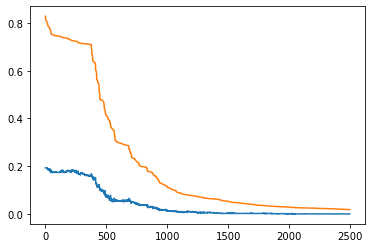

<Figure size 2400x1600 with 0 Axes>

In [921]:
plt.plot( trainingErrors)
plt.plot(upperBoundTrainingError)
plt.figure(figsize=(24,16), dpi= 100, facecolor='w', edgecolor='k')
plt.show()

# Part B: Weights stem plot

In [922]:
weightsAverage = []
for i in range(weights_[0].shape[0]):
    val = (np.sum(weights_[:,i]))
    weightsAverage.append(val/weights_.shape[0])

<StemContainer object of 3 artists>

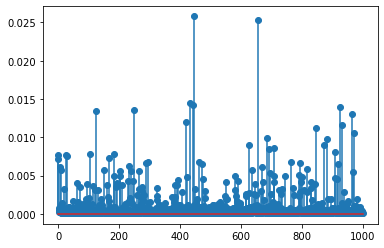

In [923]:
#print(len(weightsAverage))

y_list = list(range(0,1000))
plt.stem(y_list,weightsAverage)

# Part C: Epsilon and alpha Plots (First epsilon and then alpha)

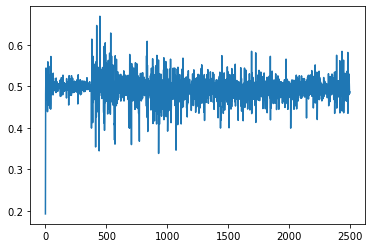

In [924]:
plt.plot(epsilonArray)
plt.show()

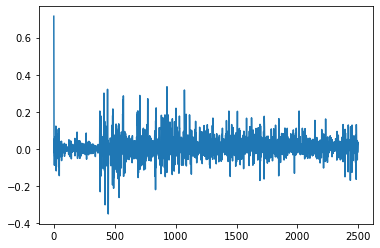

In [925]:
plt.plot(alphaArray)
plt.show()

# Problem 2: K-Means

In [962]:
mean_1 = np.array([0,0])
mean_2 = np.array([3,0])
mean_3 = np.array([0,3])
cov_1 = np.array([[1,0],[0,1]])
cov_2 = np.array([[1,0],[0,1]])
cov_3 = np.array([[1,0],[0,1]])

# Generating Data and Writing the Algorithm

In [963]:
data_1 = (np.random.multivariate_normal(mean_1, cov_1, 100))
data_2 = (np.random.multivariate_normal(mean_2, cov_2, 250))
data_3 = (np.random.multivariate_normal(mean_3, cov_3, 150))
data = np.concatenate((np.concatenate((data_1,data_2),axis=0),data_3),axis=0)

In [971]:
import random
def distance(x,y,b,a):
    return ((x-b)*(x-b)+(y-a)*(y-a))

def min_cluster(means,data_point):
    min_val = 0
    min_dist = 1000.0
    for i in range(0,len(means)):
        distanceC = distance(data_point[0],data_point[1],means[i][0],means[i][1])
        if (min_dist>distanceC):
            min_val = i
            min_dist = distanceC
    return (min_val,min_dist)

lossFunctionArray=[]
K_3=[]
K_5=[]
k_3_data = [[],[],[]]
k_5_data = [[],[],[],[],[],[]]
for K in range(2,6):
    means = []
    for k in range(0,K):
        means.append([random.uniform(-1.0, 1.0),random.uniform(-1.0, 1.0)])
    distanceArray = []
    for i in range(0,20):
        c = []
        newMeans = []
        for i in range(0,K):
            c.append(0)
            newMeans.append([0.0,0.0])
        distanceC = 0.0  
        for i in range(0,len(data)):
            clusterVal,min_dist = min_cluster(means,data[i])
            c[clusterVal]+=1
            newMeans[clusterVal][0] += data[i][0]
            newMeans[clusterVal][1] += data[i][1]
            distanceC+= min_dist 
            if(K==3):
                k_3_data[clusterVal].append(data[i])
            if(K==5):
                k_5_data[clusterVal].append(data[i])    
        distanceArray.append(distanceC)
        
        for i in range(0,len(newMeans)):
            print(newMeans[i])
            if c[i]!=0:
                newMeans[i][0]=newMeans[i][0]/c[i]
                newMeans[i][1]=newMeans[i][1]/c[i]
            else:
                newMeans[i][0]=0. 
                newMeans[i][1]=0.
        means = newMeans
    if K==3:
        K_3.append(means)
    if K==5:
        K_5.append(means)
    print(distanceArray)    
    lossFunctionArray.append(distanceArray)            
#lossFunctionArray        

[761.7293830009437, -4.828853323236416]
[-5.384444735894703, 510.49666165787147]
[774.9197424585457, 7.989686077858217]
[-18.574804193496693, 497.67812225677693]
[776.1393510913615, 10.551253007815536]
[-19.79441282631244, 495.1165553268196]
[774.4913259415769, 9.781841635249908]
[-18.14638767652784, 495.8859666993852]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730951]
[773.4811492083818, 9.040135239535122]
[-17.13621094333265, 496.6276730

# Part A: Plot the Objective function for 20 iterations

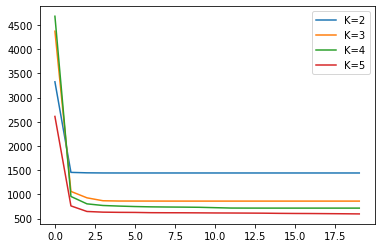

In [972]:
plt.plot(lossFunctionArray[0],label='K=2')    
plt.plot(lossFunctionArray[1],label='K=3')
plt.plot(lossFunctionArray[2],label='K=4')
plt.plot(lossFunctionArray[3],label='K=5')
plt.legend()
plt.show()

In [973]:
len(lossFunctionArray)

4

In [974]:
print(k_3_data[0][0])
cluster_1_k3=k_3_data[0]
cluster_2_k3=k_3_data[1]
cluster_3_k3=k_3_data[2]
x_c1_k3 = []
x_c2_k3 = []
x_c3_k3 = []
y_c1_k3 = []
y_c2_k3 = []
y_c3_k3 = []
for k in cluster_1_k3:
    x_c1_k3.append(k[0])
    y_c1_k3.append(k[1])
for k in cluster_2_k3:
    x_c2_k3.append(k[0])
    y_c2_k3.append(k[1])
for k in cluster_3_k3:
    x_c3_k3.append(k[0])
    y_c3_k3.append(k[1])    

[ 0.98218564 -0.59326953]


# Part B: Cluster for K=3

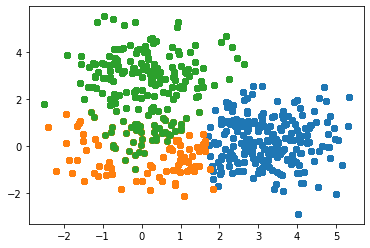

In [975]:
x= [i[0] for i in data]
y = [i[1] for i in data]
x_k3 = []
y_k3 = []
for k in K_3[0]:
    x_k3.append(k[0])
    y_k3.append(k[1])
plt.scatter(x_c1_k3,y_c1_k3)
plt.scatter(x_c2_k3,y_c2_k3)
plt.scatter(x_c3_k3,y_c3_k3)
plt.show()

# Part B: Cluster for K = 5

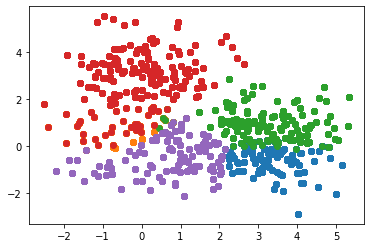

In [976]:
x= [i[0] for i in data]
y = [i[1] for i in data]
x_means_k5 = [i[0] for i in K_5[0]]
y_means_k5 = [i[1] for i in K_5[0]]
cluster_1_k5=k_5_data[0]
cluster_2_k5=k_5_data[1]
cluster_3_k5=k_5_data[2]
cluster_4_k5=k_5_data[3]
cluster_5_k5=k_5_data[4]
x_c1_k5 = []
x_c2_k5 = []
x_c3_k5 = []
y_c1_k5 = []
y_c2_k5 = []
y_c3_k5 = []
x_c4_k5 = []
x_c5_k5 = []
y_c4_k5 = []
y_c5_k5 = []
for k in cluster_1_k5:
    x_c1_k5.append(k[0])
    y_c1_k5.append(k[1])
for k in cluster_2_k5:
    x_c2_k5.append(k[0])
    y_c2_k5.append(k[1])
for k in cluster_3_k5:
    x_c3_k5.append(k[0])
    y_c3_k5.append(k[1])
for k in cluster_4_k5:
    x_c4_k5.append(k[0])
    y_c4_k5.append(k[1])
for k in cluster_5_k5:
    x_c5_k5.append(k[0])
    y_c5_k5.append(k[1])    
plt.scatter(x_c1_k5,y_c1_k5)
plt.scatter(x_c2_k5,y_c2_k5)
plt.scatter(x_c3_k5,y_c3_k5)
plt.scatter(x_c4_k5,y_c4_k5)
plt.scatter(x_c5_k5,y_c5_k5)
plt.show()

In [584]:
samplingMeans.shape

(3, 10)

In [629]:
spam = nonSpam= 0
for val in y_train:
    if val ==1:
        spam+=1
    else:
        nonSpam+=1


# Problem 3: EM-GMM Bayes Revisited  

In [908]:



def EM_GMM(x_train_spam,is_spam,K=3):
    ConsolidatedObjectiveArray = []
    for run in range(0,10):
        pi = np.full((K,1),1/K)
        n= len(x_train_spam)
        print(K)
        phi = np.zeros((n,K))
        s_mean = (np.random.multivariate_normal(np.mean(x_train_spam,axis=0),np.cov(x_train_spam.T),K))
        s_covariance= np.full((K,10,10),np.cov(x_train_spam.T)  )  
        objectiveArray = []
        for iteration in range(0,30):             

            for i in range(0,n):
                for j in range(0,K):
                    phi[i][j]=pi[j]*(multivariate_normal.pdf(x_train_spam[i],mean=s_mean[j], cov=s_covariance[j], allow_singular=True))
                divide = sum(phi[i])
                phi[i]=phi[i]/divide
            nk = np.sum(phi,axis=0)
            pi = (nk/n)
            n_K = []  
            s_mean = np.zeros((K,10))
            s_covariance = np.zeros((K,10,10))
            for i in range(0,K):
                for j in range(0,n):
                    s_mean[i]+=(phi[j][i]*x_train_spam[j])
                #print(s_mean[i])
                s_mean[i]= s_mean[i]/nk[i]
                for j in range(0,n):
                    val = (x_train_spam[j] - s_mean[i]).reshape(x_train_spam[j].shape[0],1)
                    s_covariance[i] += (phi[j][i] * np.matmul(val,val.T))
                s_covariance[i]=s_covariance[i]/nk[i] 
            if run == 4 and is_spam == 1:
                mean = s_mean
                covariance = s_covariance
                pi_c = pi
            if run == 6 and is_spam == 0:
                mean = s_mean
                covariance = s_covariance
                pi_c = pi
            objective = 0  
            for i in range(0,n):
                temp = 0
                for j in range(0,K):
                    normal_value = (multivariate_normal.pdf(x_train_spam[i],mean=s_mean[j], cov=s_covariance[j], allow_singular=True))
                    if(normal_value<np.exp(-16)):
                        normal_value=np.exp(-16)
                    normal_value *= pi[j]
                    objective+=np.log(normal_value)*phi[i][j]
            objectiveArray.append(objective) 
        ConsolidatedObjectiveArray.append(objectiveArray)   
    return (ConsolidatedObjectiveArray,mean,covariance,pi_c)  

     


In [911]:
 #For Non Spam I noticed that run 6 was averaging out to be the best and hence picked it
 #For Spam I noticed that run 4 was averaging out to be the best and hence picked it 

In [909]:
df = pd.read_csv('Prob3_Xtrain.csv',header = None)
df2 = pd.read_csv('Prob3_ytrain.csv',header = None)
x_train = df.to_numpy()
y_train = df2.to_numpy()

In [910]:
temp = []
for k in range(0,len(x_train)):
    if y_train[k][0]==1:
        temp.append(k)
df_x_train_spam = df[df.index.isin(temp)]
x_train_spam = df_x_train_spam.to_numpy()   
ConsolidatedSpamObjectiveArray,mean1,covariance1,pi1 = EM_GMM(x_train_spam,1,3)

temp = []
for k in range(0,len(x_train)):
    if y_train[k][0]==0:
        temp.append(k)
df_x_train_non_spam = df[df.index.isin(temp)]
x_train_non_spam = df_x_train_non_spam.to_numpy()   
ConsolidatedNonSpamObjectiveArray,mean2,covariance2,pi2 = EM_GMM(x_train_non_spam,0,3)

3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3


In [795]:
covariance2.shape

(3, 10, 10)

# PART A: OBJECTIVE FUNCTION FOR SPAM/NON-SPAM

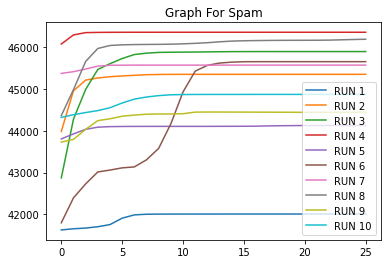

In [915]:
plt.plot(ConsolidatedSpamObjectiveArray[0][4:30],label = "RUN 1")
plt.plot(ConsolidatedSpamObjectiveArray[1][4:30],label = "RUN 2")
plt.plot(ConsolidatedSpamObjectiveArray[2][4:30],label = "RUN 3")
plt.plot(ConsolidatedSpamObjectiveArray[3][4:30],label = "RUN 4")
plt.plot(ConsolidatedSpamObjectiveArray[4][4:30],label = "RUN 5")
plt.plot(ConsolidatedSpamObjectiveArray[5][4:30],label = "RUN 6")
plt.plot(ConsolidatedSpamObjectiveArray[6][4:30],label = "RUN 7")
plt.plot(ConsolidatedSpamObjectiveArray[7][4:30],label = "RUN 8")
plt.plot(ConsolidatedSpamObjectiveArray[8][4:30],label = "RUN 9")
plt.plot(ConsolidatedSpamObjectiveArray[9][4:30],label = "RUN 10")
plt.title('Graph For Spam')
plt.legend()
plt.show()

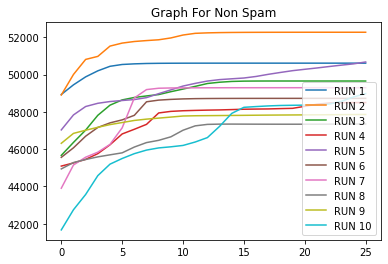

In [918]:
plt.plot(ConsolidatedNonSpamObjectiveArray[0][4:30],label = "RUN 1")
plt.plot(ConsolidatedNonSpamObjectiveArray[1][4:30],label = "RUN 2")
plt.plot(ConsolidatedNonSpamObjectiveArray[2][4:30],label = "RUN 3")
plt.plot(ConsolidatedNonSpamObjectiveArray[3][4:30],label = "RUN 4")
plt.plot(ConsolidatedNonSpamObjectiveArray[4][4:30],label = "RUN 5")
plt.plot(ConsolidatedNonSpamObjectiveArray[5][4:30],label = "RUN 6")
plt.plot(ConsolidatedNonSpamObjectiveArray[6][4:30],label = "RUN 7")
plt.plot(ConsolidatedNonSpamObjectiveArray[7][4:30],label = "RUN 8")
plt.plot(ConsolidatedNonSpamObjectiveArray[8][4:30],label = "RUN 9")
plt.plot(ConsolidatedNonSpamObjectiveArray[9][4:30],label = "RUN 10")
plt.title('Graph For Non Spam')
plt.legend()
plt.show()


In [818]:
x_test = pd.read_csv('Prob3_Xtest.csv',header = None).to_numpy()
y_test = pd.read_csv('Prob3_ytest.csv',header = None).to_numpy()
y_train_x = pd.read_csv('Prob3_ytrain.csv',header = None).to_numpy()
p_spam = 0
p_not_spam = 0
for y in y_train_x:
    if y[0]==1:
        p_spam+=1
    elif  y[0]==0:
        p_not_spam+=1
p_spam/=len(y_train_x)
p_not_spam/=len(y_train_x)


def naiveBayes(pi1,mean1,covariance1,pi2,mean2,covariance2,K):
    
    y_pred = []
    for i in range(0,len(x_test)):
        ccd1 = 0
        ccd2=0
        for j in range(0,K):
            ccd1+= pi1[j]*multivariate_normal.pdf(x_test[i],mean=mean1[j], cov=covariance1[j], allow_singular=True)
            ccd2+= pi2[j]*multivariate_normal.pdf(x_test[i],mean=mean2[j], cov=covariance2[j], allow_singular=True)
        if((p_spam*ccd1)>(p_not_spam*ccd2)):
            y_pred.append([1])
        elif((p_spam*ccd1)<(p_not_spam*ccd2)):
            y_pred.append([0])
    return y_pred    


y_pred = naiveBayes(pi1,mean1,covariance1,pi2,mean2,covariance2,3)


# PART B: CONFUSION MATRIX AND ACCURACY FOR K = 3

In [819]:

confusion_matrix(y_test, y_pred)

array([[216,  62],
       [ 20, 162]])

In [828]:
count = 0
for i in range(0,len(y_test)):
    if(y_pred[i][0]==y_test[i][0]):
        count+=1
print('Accuracy Percentage for K=3 = '+str(count/len(y_test)))        

Accuracy Percentage for K=3 = 0.8217391304347826


In [823]:
ConsolidatedSpamObjectiveArray1,mean11,covariance11,pi11 = EM_GMM(x_train_spam,1,1)
ConsolidatedNonSpamObjectiveArray1,mean21,covariance21,pi21 = EM_GMM(x_train_non_spam,0,1)

1631
1631
1631
1631
1631
1631
1631
1631
1631
1631
2509
2509
2509
2509
2509
2509
2509
2509
2509
2509


# PART B: CONFUSION MATRIX AND ACCURACY FOR K = 1

In [826]:
y_pred_1 = naiveBayes(pi11,mean11,covariance11,pi21,mean21,covariance21,1)
confusion_matrix(y_test, y_pred_1)

array([[183,  95],
       [  7, 175]])

In [829]:
count = 0
for i in range(0,len(y_test)):
    if(y_pred_1[i][0]==y_test[i][0]):
        count+=1
print('Accuracy Percentage For K=1 = '+str(count/len(y_test)))  

Accuracy Percentage For K=1 = 0.7782608695652173


In [824]:
ConsolidatedSpamObjectiveArray2,mean12,covariance12,pi12 = EM_GMM(x_train_spam,1,2)
ConsolidatedNonSpamObjectiveArray2,mean22,covariance22,pi22 = EM_GMM(x_train_non_spam,0,2)

1631
1631
1631
1631
1631
1631
1631
1631
1631
1631
2509
2509
2509
2509
2509
2509
2509
2509
2509
2509


# PART B: CONFUSION MATRIX AND ACCURACY FOR K = 2

In [835]:
y_pred_2 = naiveBayes(pi12,mean12,covariance12,pi22,mean22,covariance22,2)
confusion_matrix(y_test, y_pred_2)

array([[205,  73],
       [ 19, 163]])

In [837]:
count = 0
for i in range(0,len(y_test)):
    if(y_pred_2[i][0]==y_test[i][0]):
        count+=1
print('Accuracy Percentage For K=2 = '+str(count/len(y_test))) 

Accuracy Percentage For K=2 = 0.8


In [843]:
ConsolidatedSpamObjectiveArray4,mean14,covariance14,pi14 = EM_GMM(x_train_spam,1,4)
ConsolidatedNonSpamObjectiveArray4,mean24,covariance24,pi24 = EM_GMM(x_train_non_spam,0,4)

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4


# PART B: CONFUSION MATRIX AND ACCURACY FOR K = 4

In [844]:
y_pred_4 = naiveBayes(pi14,mean14,covariance14,pi24,mean24,covariance24,4)
confusion_matrix(y_test, y_pred_4)

array([[213,  65],
       [ 14, 168]])

In [845]:
count = 0
for i in range(0,len(y_test)):
    if(y_pred_4[i][0]==y_test[i][0]):
        count+=1
print('Accuracy Percentage For K=4 = '+str(count/len(y_test)))

Accuracy Percentage For K=4 = 0.8282608695652174
